# Data basics with numpy
This notebook is meant to help students bridge the gap from various python tutorials and courses to using python to handle data, and thinking about data as a scientist. The python pros out there will insist that packages like [pandas](http://pandas.pydata.org/) are far superior for handling data. They are probably right, but numpy is a nice transition, and people like me still use it frequently.

I will assume the student understands concepts like variables, arrays, as well as basic mathematical operations. We will build on these in the context of scientific data. Let's get started.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

For our first demonstration, we will consider a simple experiment we have all done in an introductory physics course - rolling a cart down a ramp. But we won't actually do the experiment, instead we will model what the data might look like. If our ramp is at an angle $\theta$, and is perfectly frictionless, the net force on the cart will be in the direction along the ramp with magnitude:
$$F_\mathrm{net} = mg \sin\theta$$
where $m$ is the mass of the cart and $g$ is the gravitational constant.
The accelaration, velocity, and position as functions of time, $t$, can be found to be (again, all along the direction of the ramp)
$$a(t) = g \sin\theta $$
$$v(t) = g(t-t_i) \sin\theta + v_i $$
$$x(t) = \frac{1}{2}g(t-t_i)^2 \sin\theta + v_i (t-t_i) + x_i $$
where $t_i$ is the initial time, $v_i$ is the initial velocity, and $x_i$ is the initial position on the ramp.

Imagine we already performed the experiment and measured the position of the cart as a function of time. Let's create a mock data set.

In [31]:
# First set up some constants
# We like to use variables even for things that don't change.
# That way when you want to try something else, you can easily change it in one place.
theta = 20.0  # degrees (I suggest getting in a habit of including units in comments)
theta = theta * np.pi / 180.0  # radians (Immediately convert for trig functions later)
g = 9.81  # m/s^2
v_i = 0.0  # m/s (You can try other values!)
x_i = 0.0  # m (You can try other values!)

# Next we create an array to hold time values. Say we make a measurement every 0.01 second for 2 seconds.
t_i = 0.0  # seconds (initial time)
t_f = 2.0  # seconds (final time)
dt = 0.01  # seconds (time separation)
times = np.arange(t_i, t_f, dt)  # np.arange will return an array of values from t_i to t_f, separated by dt.

While it might not seem like we've done much, let's take a second to look at what we have. We have a set of constants that define the experiment, $\theta, g, v_i, x_i$. We also have our time parameters including an initial time, final time, and time separation. We used these time parameters to create an array of time values. Let's look at that array.

(200,)
0.0
1.99


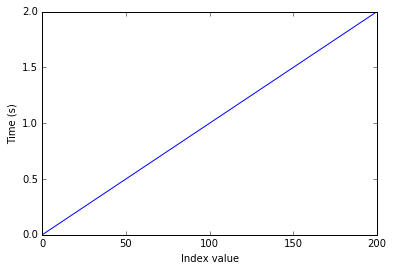

In [32]:
print(times.shape)
print(times.min())
print(times.max())
plt.plot(times);
plt.xlabel('Index value');
plt.ylabel('Time (s)');

We printed three properties of the time array - shape, minimum, and maximum. The shape is `(200,)`. Numpy array shapes are tuples, where each element is the length of the array in that direction. Here we have a one dimensional array with 200 elements. Each of those elements can be referenced with its index - a number from 0 to 199 in this case. Next we used the numpy array method `min()` to calculate the minimum of the array. This had better be equal to `t_i`, which is where we told `np.arange` to start. But the maximum is slightly less than `t_f`. This is because `np.arange` only returns values *less* than the stopping number.

Finally, we plotted the values. Not a huge surprise here - time values increasing from zero to (nearly) 2 seconds.

Now let's use our kinematic equation to mock up a data set for position. We can use the variables we created earlier to compute the expected position at each time.

In [48]:
x = 0.5 * g * np.sin(theta) * (times - t_i)**2 + v_i * (times - t_i) + x_i

When we use an array in a mathematical expression like we did above, python evaluates the expression for each element of the array, and returns an array of the same length. (Note this get complicated when you have multiple-length arrays, and multiple dimensions.) In this case, for each time value, python evaluated the position, and returned an array of 200 position values.

We can look at the shape, minimum, and maximum values of `x`. We may also want to know the average value.

In [34]:
print(x.shape)
print(x.min())
print(x.max())
print(x.mean())

(200,)
0.0
6.64349862081
2.22006360947


Now, the time and position variables are related. Each is 200 elements long, and if we line them up side-by-side, we can read off the time and position at that time. Another way to do it is with indices. Each index (from 0 to 199) is used to tell us both the time and position. Let's look at a few.

In [36]:
print(times[0], x[0])
print(times[50], x[50])
print(times[100], x[100])
print(times[199], x[199])

(0.0, 0.0)
(0.5, 0.41940220075310131)
(1.0, 1.6776088030124052)
(1.99, 6.6434986208094262)


So in this example, when times was 0, position was 0. When time was 1 second, position was 1.68 meters, and so on.

We can use a plot to simultaneously look at all the value pairs by plotting one variable on the x-axis and one variable on the y-axis. 

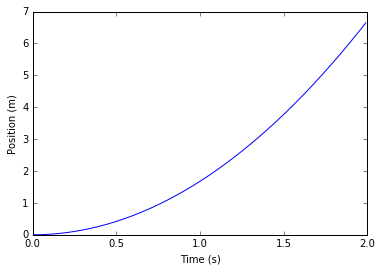

In [37]:
plt.plot(times, x);
plt.xlabel('Time (s)');
plt.ylabel('Position (m)');

Cool, that's just the type of curve we expect from a constantly accelerating cart.

Now let's do some more operations on our "data." First, let's make our measurement more realistic. Our position-measuring-device can't be perfect. Let's say our measurements are only accurate to 1 cm level. To simulate this, we will add random noise to the data.

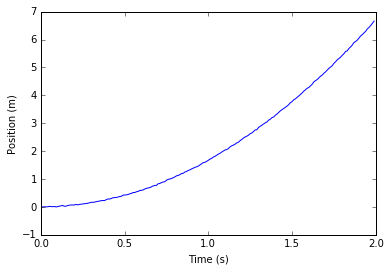

In [54]:
x_noise = 0.01 # m (This is the positional noise level)
x += x_noise * np.random.randn(len(x))
plt.plot(times, x);
plt.xlabel('Time (s)');
plt.ylabel('Position (m)');

We used the `numpy.random.randn` function to create an array of random values. We gave it our dimension length, and it returned an array of Gaussian distributed random numbers with standard deviation approximately 1.0. We then scaled those numbers by `x_noise` to make the standard deviation equal to our position uncertainty, and added them to the ideal position measurements. Now when we plot the position, the line looks "hairy" due to the imperfect measurements.

Let's use these measurements to calculate our measured velocity and acceleration. We will simply use the average velocity and acceleration over time interval equations.
$$ v_{ave} = \frac{\Delta x}{\Delta t} $$
$$ a_{ave} = \frac{\Delta v}{\Delta t} $$

In [55]:
v = (x[1:] - x[:-1]) / (times[1:] - times[:-1])  # m/s.
v.shape

(199,)

We used some shorthand indexing above to take elements 1 to the end, and subtract elements 0 to 1-from-the-end. This gives us the difference between all the adjacent elements in an array. Numpy has a function for doing this as well, and from now on we will use `np.diff()`.

But notice the velocity array is only 199 elements long! This is because if you want to pair up elements, you get one less pair than you have elements. Or think about it as taking an element and subtracting the one before it. But the 0th element doesn't have one before it, so it is never the larger value. Alas, this means we need a new time array. We could just use the first 199 elements, but that's actually not quite correct. Because we used two position measurements to measure the velocity, we should use their average times for the time axis.

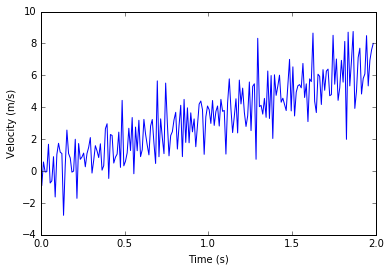

In [56]:
times_v = (times[1:] + times[:-1]) / 2.0
plt.plot(times_v, v);
plt.xlabel('Time (s)');
plt.ylabel('Velocity (m/s)');

Interesting! We can see the general trend of a constantly increasing value, but the noise is now a lot more apparent. We will come back to that, but let's push forward and look at acceleration.

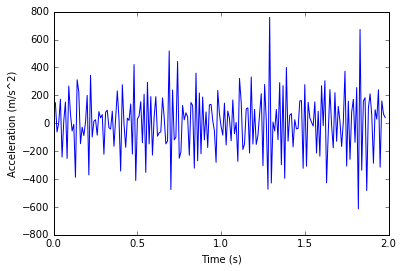

In [57]:
a = np.diff(v) / np.diff(times_v)  # m/s^2. Remember np.diff() gives us the difference between adjacent elements.
times_a = (times_v[1:] + times_v[:-1]) / 2.0
plt.plot(times_a, a);
plt.xlabel('Time (s)');
plt.ylabel('Acceleration (m/s^2)');

Whoa! Now that's really noisy! Values are fluctuating across hundreds of m/s^2! What are we to do? Let's try a couple things. First, what's the average value?

In [68]:
print(a.mean())

4.4991332661


Ok, so what do we expect it to be? Remember the acceleration should be $g\sin\theta$. So let's rephrase it as a measurement of $g$.

In [70]:
g_meas1 = a.mean() / np.sin(theta)  # m/s^2
print(g_meas1)

13.1545856403


It's in the ballpark  - certainly better than the huge levels we saw above, but still not great.
One way to improve is to use a polynomial fit to the data. Let's fit for the position using a 2nd order polynomial, and we should get a better result. We will use `np.polyfit()`

In [73]:
px = np.polyfit(times, x, 2)  # returns polynomial coefficients
x_i_meas = px[2]
v_i_meas = px[1]
g_meas2 = 2 * px[0] / np.sin(theta)  # 2 because of the 1/2 in the kinematics equation
print(x_i_meas)
print(v_i_meas)
print(g_meas2)

0.00322912085239
-0.00600380699639
9.82254584383


Well that's a heck of a lot better! Our initial position and velocity look good, and we got the gravitational acceleration to within 1%. Not bad!

Now that we've gone through the experiment, you might want to try going back and changing pieces of the setup - like the angle of the ramp, the starting positions and velocities, and the noise level. You could also try different time separations, or the maximum time.